In [91]:
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np
#http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract

In [92]:
dataset = datasets.fetch_mldata("MNIST Original")


In [93]:
features = np.array(dataset.data, 'int16') 
labels = np.array(dataset.target, 'int')

In [94]:
list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

/anaconda3/envs/python36/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/anaconda3/envs/python36/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [95]:
hog_features[0]

array([0.09474566, 0.21826482, 0.56455488, 0.10973075, 0.01083132,
       0.        , 0.        , 0.        , 0.00187232, 0.19158122,
       0.01919099, 0.15144225, 0.05757229, 0.11155927, 0.03741327,
       0.14039837, 0.11037879, 0.18046342, 0.28421488, 0.10021365,
       0.06537253, 0.07112686, 0.17175267, 0.07220898, 0.09149814,
       0.05529358, 0.08831856, 0.12449687, 0.18801044, 0.50839458,
       0.10480461, 0.03754237, 0.        , 0.        , 0.00553629,
       0.03121465])

In [96]:
clf = LinearSVC()
clf.fit(hog_features, labels)
joblib.dump(clf, "digits_cls.pkl", compress=3)


['digits_cls.pkl']

In [105]:
# Load the classifier
clf = joblib.load("digits_cls.pkl")
# Read the input image 
im = cv2.imread("vin12.jpg")


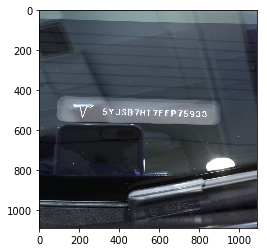

In [106]:
plt.imshow(im)

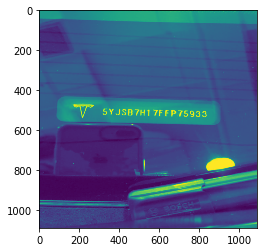

In [107]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
plt.imshow(im_gray)

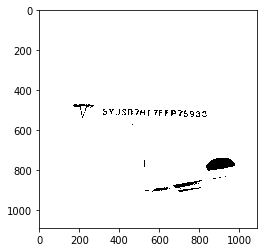

In [108]:
ret, im_th = cv2.threshold(im_gray, 205, 255, cv2.THRESH_BINARY_INV)
plt.imshow(im_th,cmap='gray')

In [109]:
# Find contours in the image
ctrs = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(cv2.__version__)
#print (ctrs[0])
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs[0]]

#sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

print(rects[0])

(0, 0, 1, 1088)


/anaconda3/envs/python36/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/anaconda3/envs/python36/lib/python3.6/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


{2}
V 5YJSB7H17FFP75933


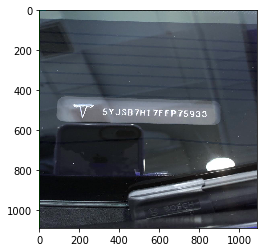

In [110]:
im = cv2.imread("vin12.jpg")
x= set()
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    if roi.size ==0:
        continue
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    x.add(nbr[0])
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

plt.imshow(im)
print(x)

config = ('-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')
text = pytesseract.image_to_string(im_th,config=config)
print(text)